## Evaluation Techniques Assignment

Welcome! You will build a simple LSTM model to calculate the perplexity of the model. 
This assignment will step you through how to create next probable word using a basic LSTM model. This can be extend to more powerful deep learning models.

#### Instructions
- Do not modify any of the codes.
- Only write code when prompted. For example in some sections you will find the following,
```
# YOUR CODE GOES HERE
# YOUR CODE ENDS HERE
# TODO
```

Only modify those sections of the code.

You will learn to:

- **Prepare a text dataset for sequence modeling**, including:
  - Loading and preprocessing text data (IMDb movie reviews).
  - Tokenizing the text into bigrams.
  - Creating a vocabulary and mapping words to indices.
  - Converting words into sequences of numerical indices.
  - Preparing input-output sequences for training.

- **Build and train an LSTM-based language model**, including:
  - Initializing and configuring the architecture of the LSTM model:
    - An embedding layer for mapping words to dense vectors.
    - An LSTM layer for capturing temporal dependencies in sequences.
    - A dense output layer to predict the next word.
  - Compiling the model with an appropriate loss function and optimizer.

- **Evaluate the model using perplexity**, including:
  - Computing the probability of the actual next word in the sequence.
  - Calculating the model's perplexity to assess its performance.

- **Integrate all components into a streamlined workflow**, in the correct order:
  - Preprocess the data.
  - Build and compile the LSTM model.
  - Calculate perplexity to evaluate the model's predictive power.

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from helper import build_LSTM_model, compile_LSTM_model, train_LSTM_model, create_input_output
from tests import test_dataset_loading, test_vocab_creation, test_sequences, test_model_building, test_training_output, test_perplexity

## Data Loading

This dataset contains a large collection of movie reviews from the Internet Movie Database (IMDB). We'll look at a subset of the data.

In [2]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_data = dataset['train'].map(lambda x, y: x)
test_data = dataset['test'].map(lambda x, y: x)
test_dataset_loading(train_data, train_data)

In [ ]:
#Limit only first 500 rows in train_data and 100 in test_data

train_texts = list(train_data.take(500))
test_texts = list(test_data.take(100))

### Create Bigrams

In [4]:
def tokenize(text):
    return text.numpy().decode('utf-8').split()

In [5]:
def extract_bigrams(text):
    tokenized_words = # YOUR CODE GOES HERE
    bigrams = # YOUR CODE GOES HERE
    return bigrams

### Extract Bigrams

In [6]:
# TODO
train_bigrams = 
test_bigrams = 

### Building vocabulary

In [7]:
train_words = [w for bigram in train_bigrams for w in bigram]
test_words = [w for bigram in test_bigrams for w in bigram]


In [8]:
vocab = list(set(train_words))
vocab_size = len(vocab)
word_to_idx = # YOUR CODE GOES HERE
word_to_idx["<UNK>"] = vocab_size  # Unknown token
idx_to_word = {idx: word for word, idx in word_to_idx.items()}

test_vocab_creation(vocab, idx_to_word)

### Convert Words to Indices

In [9]:
train_sequences = [word_to_idx.get(word, word_to_idx["<UNK>"]) for word in train_words]
test_sequences = [word_to_idx.get(word, word_to_idx["<UNK>"]) for word in test_words]
test_sequences(train_sequences, test_sequences)

## Create input-output sequences

In [10]:
X_train, y_train = create_input_output(train_sequences)
X_test, y_test = create_input_output(test_sequences)

## Model building, compiling, and training

In [ ]:
model = build_LSTM_model(vocab_size, X_train.shape[1])
test_model_building(model)
compile_LSTM_model(model)
with tf.device('/GPU:0'):
    train_LSTM_model(model, X_train, y_train, X_test, y_test)

## Calculate log probability sum and perplexity

Here’s the content formatted for a markdown cell in your Jupyter Notebook:

---

## **Connection to Log Probability Sum**

Perplexity is directly derived from the **log probability sum** of the predicted probabilities for a sequence of words. It is a measure of how well a language model predicts a given sequence.

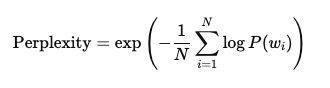

### **Explanation**
1. **Log Probability Sum**:
   - The log of the predicted probability \(P(w_i)\) for each word captures the model's confidence in its prediction.
   - Summing these log probabilities gives an aggregate measure of the model's performance over the entire sequence.

2. **Averaging and Exponentiating**:
   - The negative average of the log probabilities normalizes the sum by the sequence length, making it independent of sequence size.
   - Exponentiating converts the log scale into a human-readable metric, where **lower perplexity** indicates better model performance.

### **Intuition**
- If the model assigns **high probabilities** to the correct words in the sequence, the log probability sum is less negative, resulting in a **lower perplexity**.
- Conversely, a **high perplexity** indicates the model struggles to predict the sequence accurately, reflecting higher uncertainty or "perplexity" about the text.

In [ ]:
def calculate_perplexity(model, X, y):
    """Calculate perplexity of the model."""
    with tf.device('/GPU:0'):
        predictions = # YOUR CODE GOES HERE
        log_prob_sum = 0
        N = len(y)
        
        for i in range(N):
            prob = predictions[i, y[i]]
            log_prob_sum += # YOUR CODE GOES HERE
        
        perplexity = # YOUR CODE GOES HERE
        return perplexity

perplexity = calculate_perplexity(model, X_test, y_test)
test_perplexity(perplexity)
print(f'Perplexity: {perplexity}')